C:\Users\91738\AppData\Local\Temp\ipykernel_24348\70579643.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender']= le.fit_transform(X['Gender'])
C:\Users\91738\AppData\Local\Temp\ipykernel_24348\70579643.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Occupation']= le.fit_transform(X['Occupation'])
C:\Users\91738\AppData\Local\Temp\ipykernel_24348\70579643.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

[[136  61]
 [ 70  33]]
0.5633333333333334


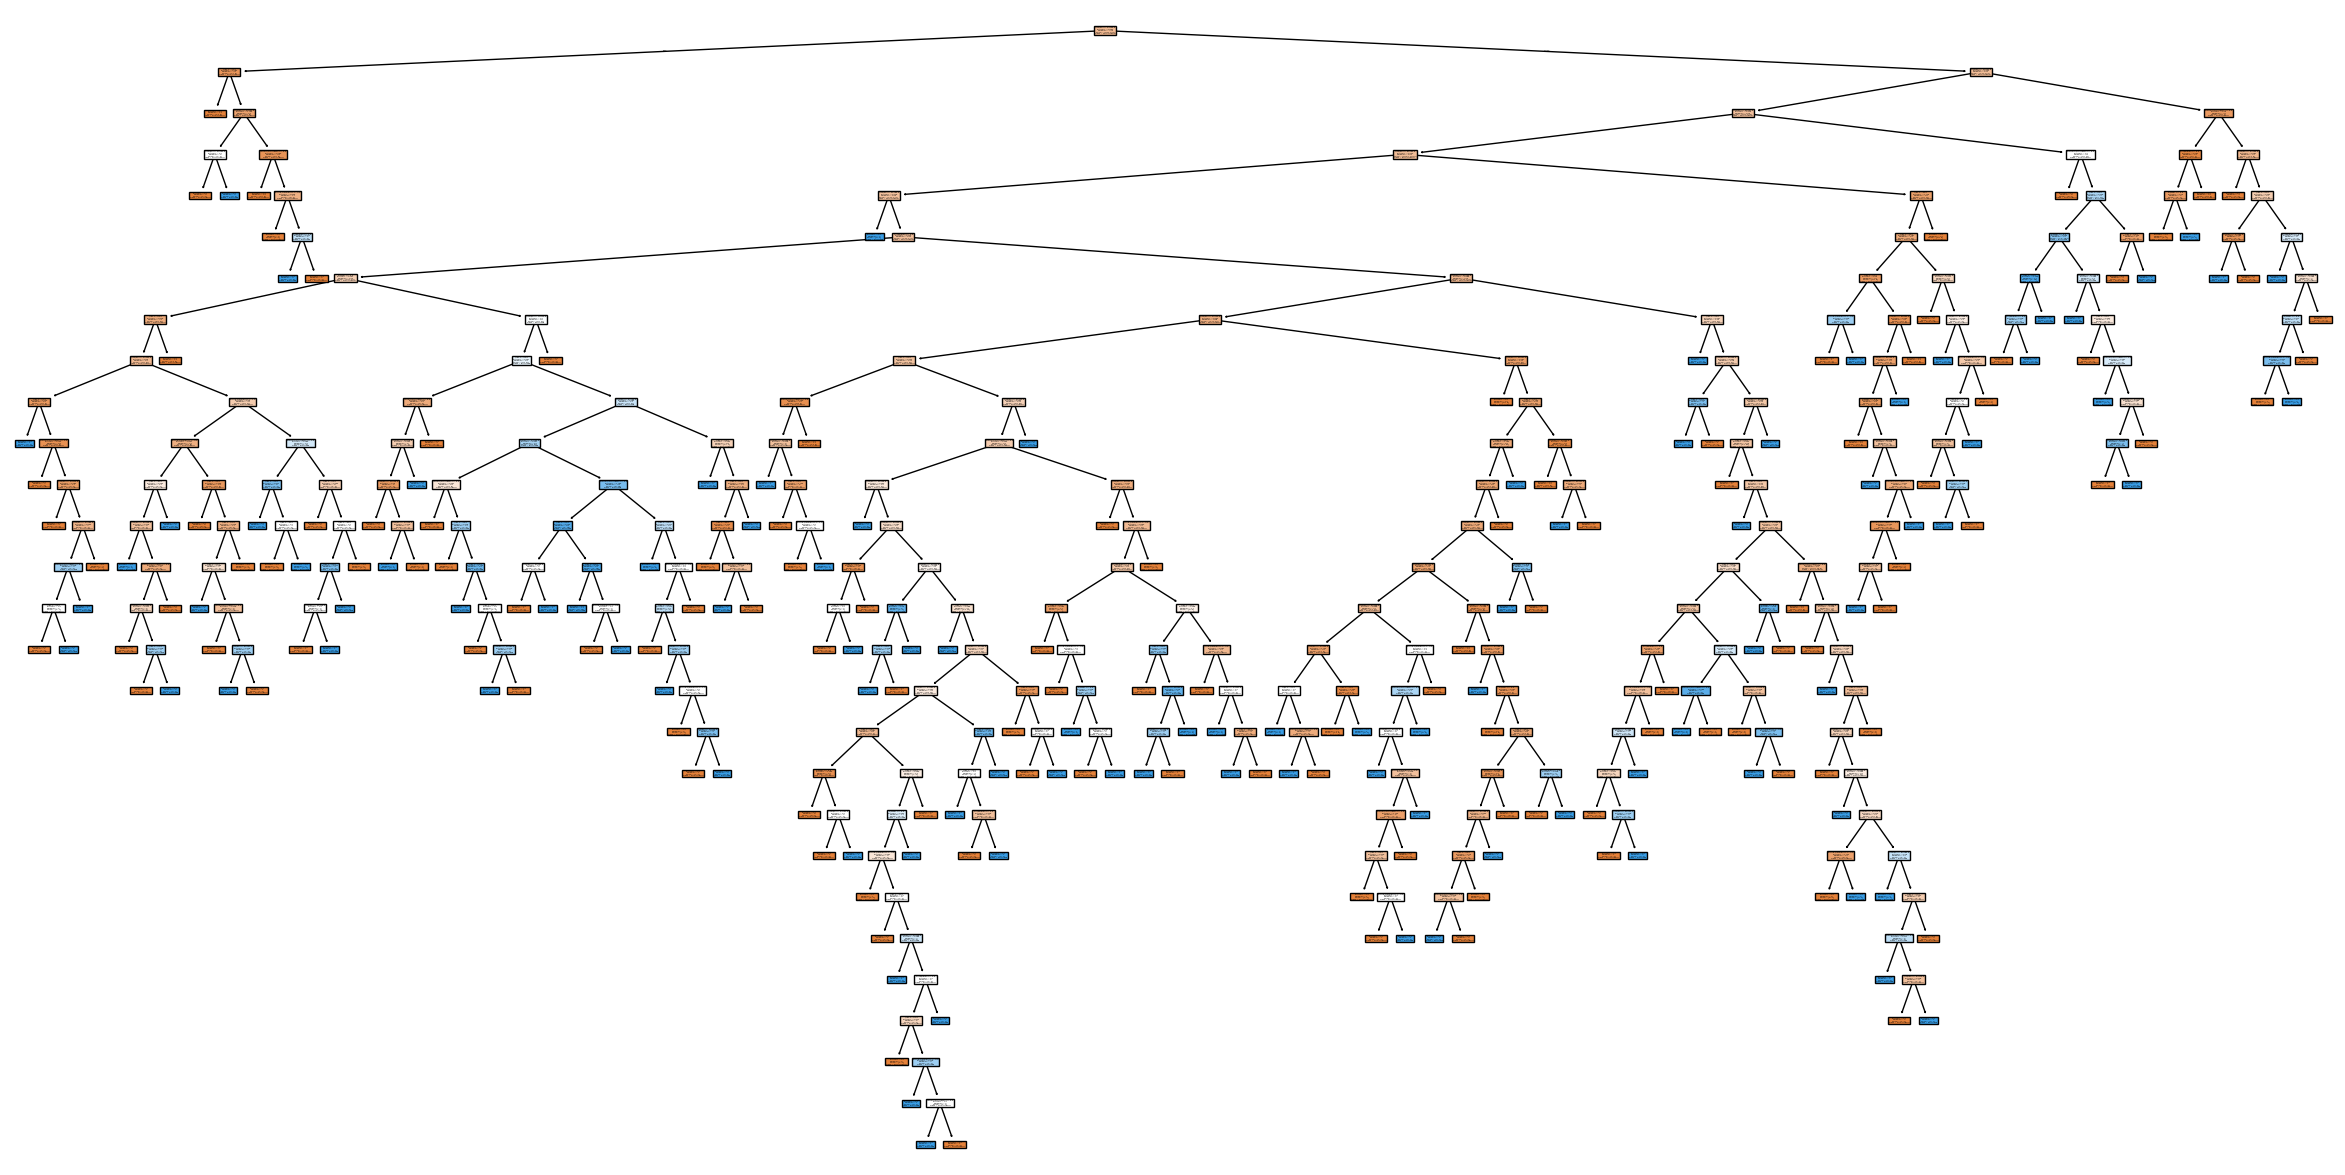

In [18]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import tree

#load the dataset
df = pd.read_csv('laptop_buying_data.csv')
df.head()

# feature selection from the above datasets
X = df[['Age', 'Gender', 'Occupation', 'Income', 'Brand Preference', 'Previous Purchases']]
y =df[['Purchase Intention']]


#we need to encode the features using the label encoder
le = LabelEncoder()
X['Gender']= le.fit_transform(X['Gender'])
X['Occupation']= le.fit_transform(X['Occupation'])
X['Brand Preference']= le.fit_transform(X['Brand Preference'])

# we need to split the data for training and testing purpose
X_train , X_test , y_train , y_test = train_test_split(X ,y , test_size=0.3, random_state=42)

#Intilise the model
ID3_model = DecisionTreeClassifier(criterion= "entropy", random_state=42 )

#training the model for given training dataset
ID3_model.fit(X_train, y_train)

y_predicted = ID3_model.predict(X_test)

#cal the confusion matrix
confusionMatrix = confusion_matrix(y_test , y_predicted)
print(confusionMatrix)

#For calculating the model accuracy
accuracy = accuracy_score(y_test, y_predicted)
print(accuracy)

#for plotting the tree
plt.figure(figsize=(30,15))
tree.plot_tree(ID3_model , filled=True, feature_names=X.columns , class_names=['No Purchase' , 'Purchase']  )
plt.show()


